# Taller Final

----------

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



In [8]:
df = pd.read_csv('robosdebicicletas.csv',sep=';')

## Primera Revision
-----

In [10]:
df.head()

,X,Y,OBJECTID,event_unique_id,Primary_Offence,Occurrence_Date,Occurrence_Year,Occurrence_Month,Occurrence_DayOfWeek,Occurrence_DayOfMonth,...,Bike_Make,Bike_Model,Bike_Type,Bike_Speed,Bike_Colour,Cost_of_Bike,Status,Longitude,Latitude,ObjectId2
0,-8.779.074.718,5.450.835.028,18319,GO-20192122045,THEFT UNDER - BICYCLE,2019/10/18 04:00:00+00,2019,October,Friday,18,...,GIANT,TCRA1,RG,20,BLKWHI,670.00,STOLEN,-7.886.377,4.390.553.437,18355
1,-8.786.146.025,5.447.722.771,8047,GO-20162022392,B&E,2016/11/10 05:00:00+00,2016,November,Thursday,10,...,SCOTT,SCALE,MT,11,BLKGRN,1800.00,STOLEN,-7.892.729.263,4.388.538.775,8623
2,-8.786.146.025,5.447.722.771,12416,GO-20162022392,B&E,2016/11/10 05:00:00+00,2016,November,Thursday,10,...,CERVELO,SOLSIST,OT,8,BLKBLU,3400.00,STOLEN,-7.892.729.263,4.388.538.775,12365
3,-8.800.359.984,5.446.687.524,18944,GO-20209010545,THEFT UNDER,2019/11/25 05:00:00+00,2019,November,Monday,25,...,GI,ESCAPE 3,RG,21,BLK,632.77,STOLEN,-7.905.497.879,4.387.868.476,18171
4,-8.800.359.984,5.446.687.524,23383,GO-20209010545,THEFT UNDER,2019/11/25 05:00:00+00,2019,November,Monday,25,...,OT,R2,RC,11,WHI,3615.97,STOLEN,-7.905.497.879,4.387.868.476,23787


In [12]:
# se ven 29870 filas y 35 columnas
df.shape

(29870, 35)

In [11]:
# se ven que columnas Bike_Model , Cost_of_Bike y Bike_Type tienen valores nulos
df.isna().sum()

X                            0
Y                            0
OBJECTID                     0
event_unique_id              0
Primary_Offence              0
Occurrence_Date              0
Occurrence_Year              0
Occurrence_Month             0
Occurrence_DayOfWeek         0
Occurrence_DayOfMonth        0
Occurrence_DayOfYear         0
Occurrence_Hour              0
Report_Date                  0
Report_Year                  0
Report_Month                 0
Report_DayOfWeek             0
Report_DayOfMonth            0
Report_DayOfYear             0
Report_Hour                  0
Division                     0
City                         0
Hood_ID                      0
NeighbourhoodName            0
Location_Type                0
Premises_Type                0
Bike_Make                    0
Bike_Model               11283
Bike_Type                    0
Bike_Speed                   0
Bike_Colour               2461
Cost_of_Bike              2019
Status                       0
Longitud

In [ ]:
#msno.matrix(df)
#plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29870 entries, 0 to 29869
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X                      29870 non-null  object 
 1   Y                      29870 non-null  object 
 2   OBJECTID               29870 non-null  int64  
 3   event_unique_id        29870 non-null  object 
 4   Primary_Offence        29870 non-null  object 
 5   Occurrence_Date        29870 non-null  object 
 6   Occurrence_Year        29870 non-null  int64  
 7   Occurrence_Month       29870 non-null  object 
 8   Occurrence_DayOfWeek   29870 non-null  object 
 9   Occurrence_DayOfMonth  29870 non-null  int64  
 10  Occurrence_DayOfYear   29870 non-null  int64  
 11  Occurrence_Hour        29870 non-null  int64  
 12  Report_Date            29870 non-null  object 
 13  Report_Year            29870 non-null  int64  
 14  Report_Month           29870 non-null  object 
 15  Re

In [16]:
# 22 filas duplicadas enteras
df.duplicated().sum()

np.int64(22)

### Revision de outliers

In [17]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.head()

,OBJECTID,Occurrence_Year,Occurrence_DayOfMonth,Occurrence_DayOfYear,Occurrence_Hour,Report_Year,Report_DayOfMonth,Report_DayOfYear,Report_Hour,Bike_Speed,Cost_of_Bike,ObjectId2
0,18319,2019,18,291,17,2019,3,307,0,20,670.00,18355
1,8047,2016,10,315,17,2016,14,319,9,11,1800.00,8623
2,12416,2016,10,315,17,2016,14,319,9,8,3400.00,12365
3,18944,2019,25,329,18,2020,6,97,11,21,632.77,18171
4,23383,2019,25,329,18,2020,6,97,11,11,3615.97,23787


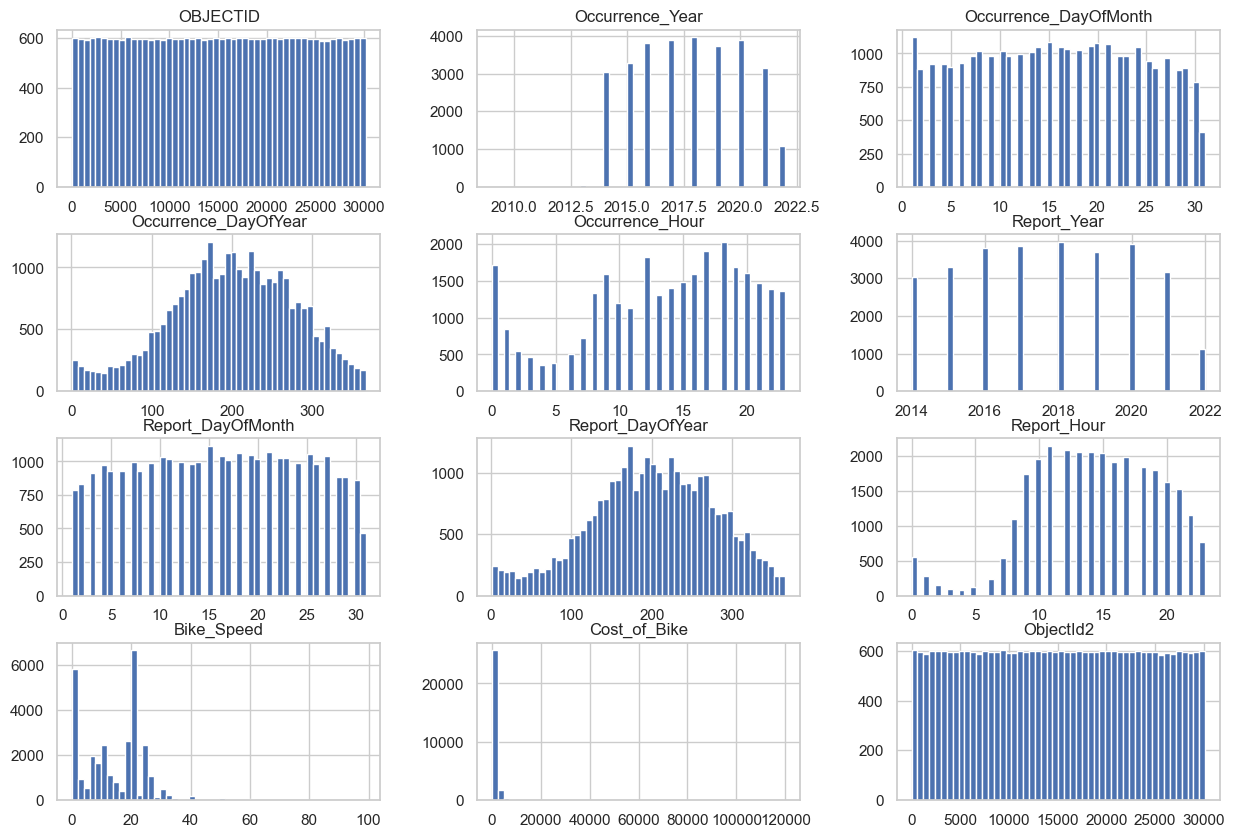

In [23]:
df_numeric.hist(figsize=(15, 10), bins=50)
plt.show()

In [29]:
df_numeric.describe()

,OBJECTID,Occurrence_Year,Occurrence_DayOfMonth,Occurrence_DayOfYear,Occurrence_Hour,Report_Year,Report_DayOfMonth,Report_DayOfYear,Report_Hour,Bike_Speed,Cost_of_Bike,ObjectId2
count,29870.000000,29870.000000,29870.000000,29870.000000,29870.000000,29870.000000,29870.000000,29870.000000,29870.000000,29870.000000,27851.000000,29870.000000
mean,15069.433311,2017.713659,15.592434,198.934081,13.276799,2017.734081,15.926950,199.747037,14.245865,14.067392,961.584075,15069.021292
std,8704.019278,2.324462,8.598721,77.797161,6.564640,2.320836,8.559365,78.044343,5.049742,10.502500,1626.901925,8703.856867
min,1.000000,2009.000000,1.000000,1.000000,0.000000,2014.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,7529.250000,2016.000000,8.000000,147.000000,9.000000,2016.000000,9.000000,148.000000,11.000000,6.000000,350.000000,7532.250000
50%,15069.500000,2018.000000,16.000000,201.000000,14.000000,2018.000000,16.000000,202.000000,14.000000,15.000000,620.000000,15068.500000
75%,22596.750000,2020.000000,23.000000,257.000000,19.000000,2020.000000,23.000000,258.000000,18.000000,21.000000,1000.000000,22596.750000
max,30154.000000,2022.000000,31.000000,366.000000,23.000000,2022.000000,31.000000,366.000000,23.000000,99.000000,120000.000000,30154.000000


In [30]:
scaler = StandardScaler()
df_numeric_standardized = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

df_numeric_standardized.describe()

,OBJECTID,Occurrence_Year,Occurrence_DayOfMonth,Occurrence_DayOfYear,Occurrence_Hour,Report_Year,Report_DayOfMonth,Report_DayOfYear,Report_Hour,Bike_Speed,Cost_of_Bike,ObjectId2
count,2.987000e+04,2.987000e+04,2.987000e+04,2.987000e+04,2.987000e+04,2.987000e+04,2.987000e+04,2.987000e+04,2.987000e+04,2.987000e+04,2.785100e+04,2.987000e+04
mean,-5.209537e-17,4.273342e-14,1.003847e-16,4.757568e-17,-6.327565e-17,-2.768619e-14,-3.377873e-17,5.994535e-17,8.658773e-17,-6.470292e-17,1.020492e-17,-6.613019e-17
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000018e+00,1.000017e+00
min,-1.731233e+00,-3.748740e+00,-1.697075e+00,-2.544275e+00,-2.022506e+00,-1.608965e+00,-1.743961e+00,-2.546634e+00,-2.821155e+00,-1.339455e+00,-5.910629e-01,-1.731218e+00
25%,-8.663020e-01,-7.372406e-01,-8.829872e-01,-6.675687e-01,-6.515013e-01,-7.471919e-01,-8.092967e-01,-6.630577e-01,-6.427892e-01,-7.681530e-01,-3.759262e-01,-8.659262e-01
50%,7.661989e-06,1.231879e-01,4.739925e-02,2.655564e-02,1.101679e-01,1.145809e-01,8.534641e-03,2.886821e-02,-4.868952e-02,8.880015e-02,-2.099636e-01,-5.989310e-05
75%,8.648238e-01,9.836164e-01,8.614874e-01,7.463883e-01,8.718371e-01,9.763537e-01,8.263660e-01,7.464210e-01,7.434434e-01,6.601023e-01,2.361336e-02,8.648872e-01
max,1.733087e+00,1.844045e+00,1.791874e+00,2.147491e+00,1.481172e+00,1.838127e+00,1.761030e+00,2.130273e+00,1.733610e+00,8.087030e+00,7.317009e+01,1.733166e+00


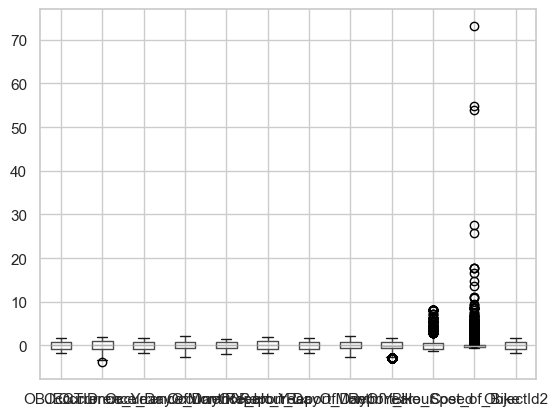

In [28]:


df_numeric_standardized.boxplot()
plt.show()